In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from pycirclize import Circos, sector
from pycirclize.parser import Matrix
from itertools import permutations
from PIL import Image
import matplotlib.image as mpimg

In [2]:
table_5_A = pd.read_excel("Table_5.xlsx",sheet_name="Fig5 panel a")
table_5_B = pd.read_excel("Table_5.xlsx",sheet_name="Fig 5 panel b")
table_5_C = pd.read_excel("Table_5.xlsx",sheet_name="Fig5 panel c")

#### Table 5 A data preprocessing

In [3]:
matrix_size_A = len(table_5_A["source taxon"].value_counts().index)
table_5_A_matrix = pd.DataFrame(np.zeros((matrix_size_A, matrix_size_A)),  index=list(table_5_A["source taxon"].value_counts().index), columns=list(table_5_A["target taxon"].value_counts().index))
for i in range(len(table_5_A)):
    source = table_5_A["source taxon"][i]
    target = table_5_A["target taxon"][i]
    table_5_A_matrix.loc[target, source] = table_5_A['Number of shared GCFs'][i]

#### Table 5 B data preprocessing

In [4]:
table_5_B = table_5_B.replace({"Streptomyces_B":"SB","Streptomyces_C":"SC","Streptomyces_D":"SD"})
matrix_size_B = len(table_5_B["source taxon"].value_counts().index)
table_5_B_matrix = pd.DataFrame(np.zeros((matrix_size_B, matrix_size_B)),  index=list(table_5_B["source taxon"].value_counts().index), columns=list(table_5_B["target taxon"].value_counts().index))
for i in range(len(table_5_B)):
    source = table_5_B["source taxon"][i]
    target = table_5_B["target taxon"][i]
    table_5_B_matrix.loc[target, source] = table_5_B['Number of shared GCFs'][i]

#### Table 5 C data preprocessing

In [5]:
GCFs = []
pGCFs= []
for i in range(len(table_5_C)):
    GCFs.append("GCFs")
    pGCFs.append("pGCFs")

table_5_C["GCFs"] = GCFs
table_5_C["pGCFs"] = pGCFs

table_5_C_1 = table_5_C[["REDgroup", "Number of actual GCFs", "GCFs"]].rename(columns={"GCFs" : "groups", "Number of actual GCFs" : "Number of GCFs"})

table_5_C_2 = table_5_C[["REDgroup", "Number of potential GCFs", "pGCFs"]].rename(columns={"pGCFs" : "groups", "Number of potential GCFs" : "Number of GCFs"})

new_table_5_C = pd.concat((table_5_C_1, table_5_C_2))

#### FIGURE 5 A

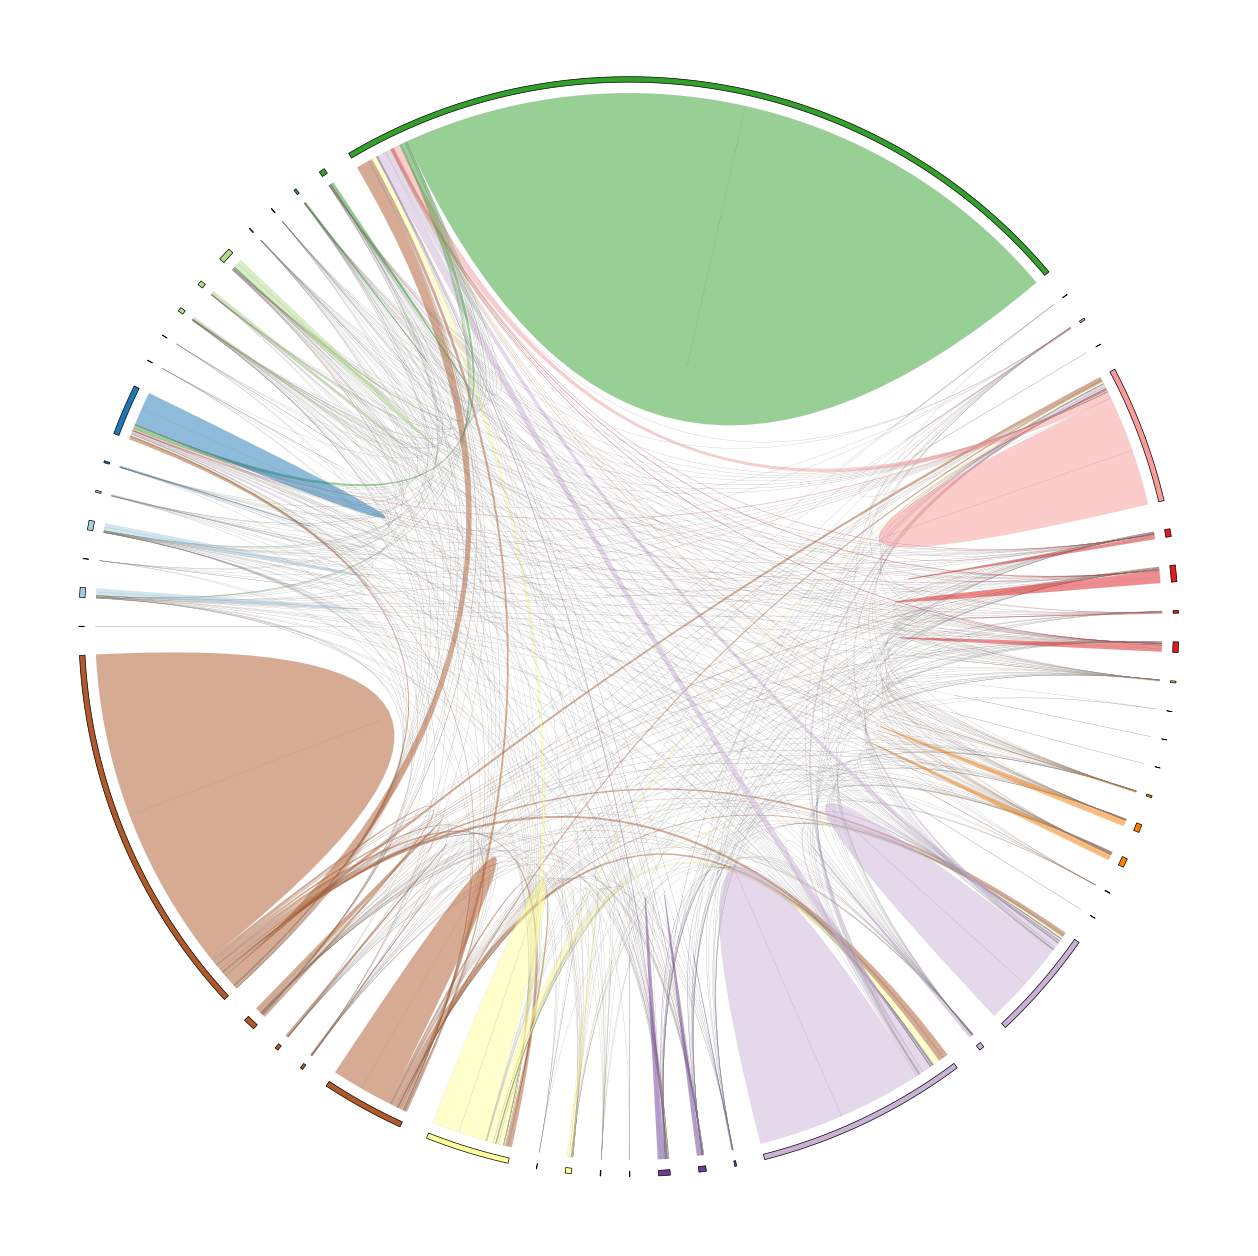

In [6]:
fig = plt.figure(figsize=(15, 15), dpi=100)

polar_ax = fig.add_subplot(polar=True)

circos = Circos.initialize_from_matrix(
    table_5_A_matrix.transpose(),
    cmap="Paired",
    space=3,
    start=-90,end=270,
    r_lim=(99,100),
    label_kws=dict(size=0,color="white"),
    link_kws=dict(direction=0,r1=97,r2=97)
)

fig = circos.plotfig(ax=polar_ax)

fig.savefig("output_figure_5_A_Topic_10.png", dpi=600)

In [7]:
original_img = Image.open("Figure_5_A.png")
 
horz_img = original_img.transpose(method=Image.FLIP_LEFT_RIGHT)
horz_img.save("Figure_5_A.png")
 
original_img.close()
horz_img.close()

#### FIGURE 5 B

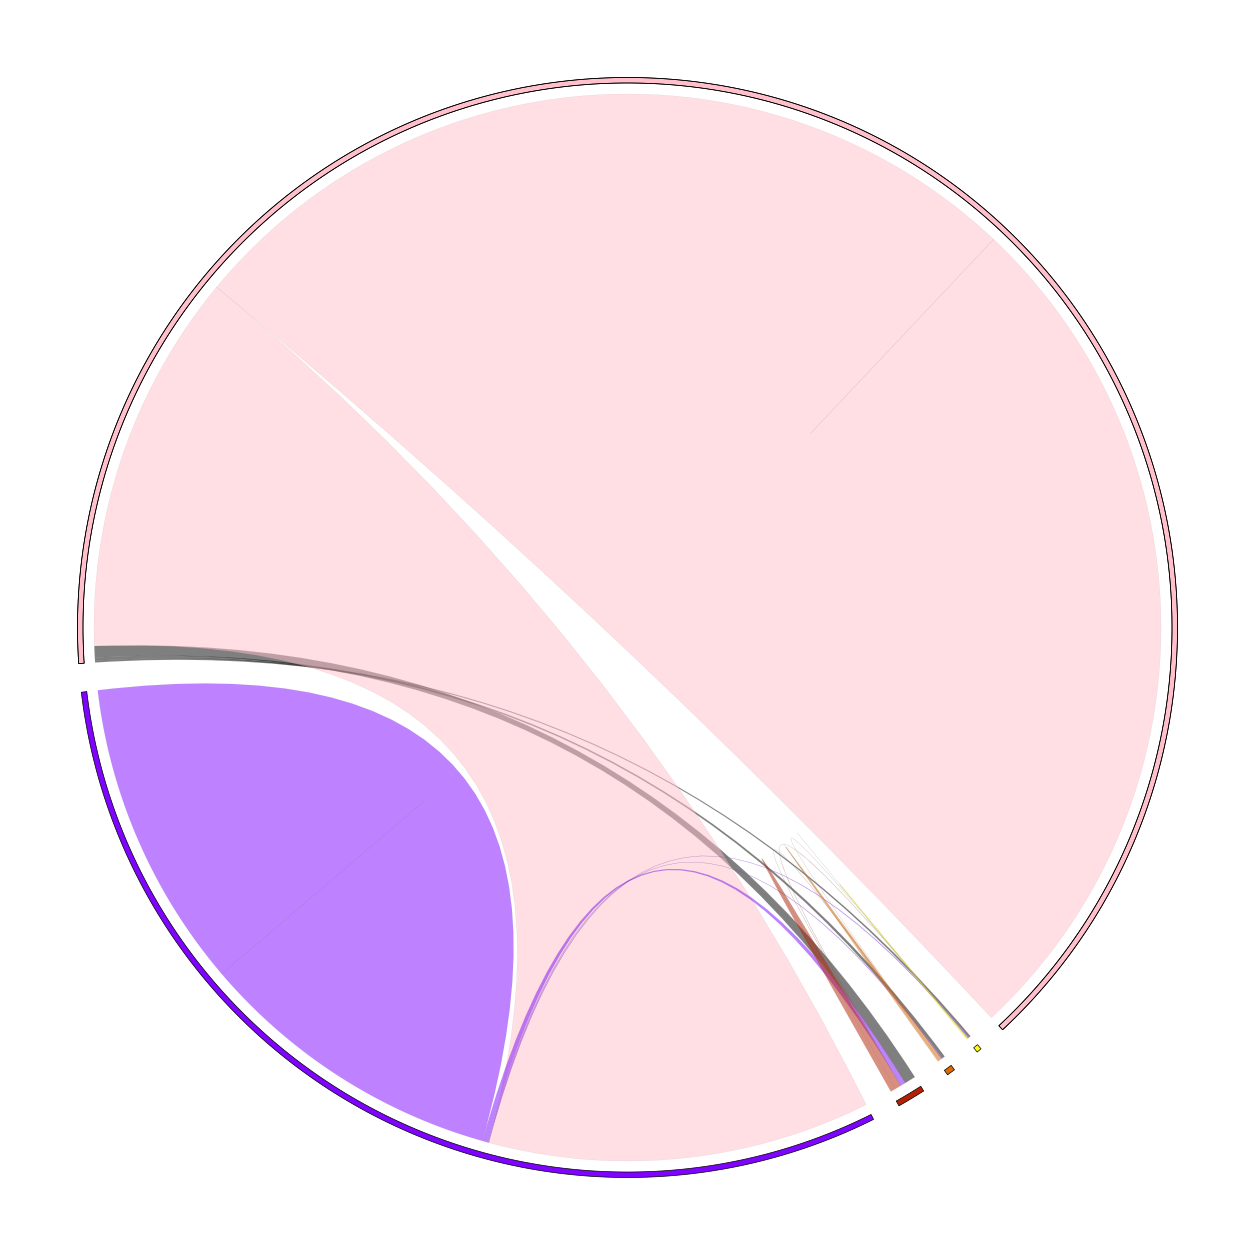

In [8]:
fig = plt.figure(figsize=(15, 15), dpi=100)

polar_ax = fig.add_subplot(polar=True)

circos = Circos.initialize_from_matrix(
    table_5_B_matrix.transpose(),
    cmap="gnuplot_r",
    link_cmap=[("Actinobacteriota", "Actinobacteriota", "pink"),("Actinobacteriota", "Streptomyces", "pink")],
    space=3,
    start=-220,end=140,
    r_lim=(99,100),
    label_kws=dict(size=0,color="white"),
    link_kws=dict(direction=0,r1=97,r2=97)
)

for sector in circos.sectors:
    track = sector.get_track("Track01")
    if sector.name.startswith("A"):
        color = "pink"
        track.axis(fc=color)

fig = circos.plotfig(ax=polar_ax)

fig.savefig("Figure_5_B.png", dpi=600)

In [ ]:
original_img = Image.open("Figure_5_B.png")
 
horz_img = original_img.transpose(method=Image.FLIP_LEFT_RIGHT)
horz_img.save("Figure_5_B.png")
 
original_img.close()
horz_img.close()

In [ ]:
img = mpimg.imread('Figure_5_B.png')

fig, ax = plt.subplots(figsize=(10,10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.imshow(img, alpha=0.7)

ax.text(2700, 3000, "Non-streptomycete\nActinobacteria", fontsize=15, color='black', ha='center', va='center')

ax.text(5500, 5300, "Streptomyces", fontsize=15, color='black', ha='center', va='center')

ax.annotate(text="Streptomyces_B", fontsize=9, color='black', ha='center', va='center', xy=(2000, 6590), xytext=(2300, 7100),
            arrowprops=dict(facecolor='black',arrowstyle="-",lw=1.5))

ax.annotate(text="Streptomyces_C", fontsize=9, color='black', ha='center', va='center', xy=(1800, 6490), xytext=(1200, 6800),
            arrowprops=dict(facecolor='black', arrowstyle="-",lw=1.5))

ax.annotate(text="Streptomyces_D", fontsize=9, color='black', ha='center', va='center', xy=(1693, 6260), xytext=(1700, 5600),
            arrowprops=dict(facecolor='black',arrowstyle="-",lw=1.5))

plt.show()

fig.savefig("Figure_5_B.png", dpi=600)

#### FIGURE 5 C i,ii

In [ ]:
f, ax = plt.subplots(figsize=(2, 12), dpi=400)

new_table_5_C['groups'] = pd.Categorical(new_table_5_C['groups'], categories=['GCFs', 'pGCFs'])

ax = sns.barplot(x="Number of GCFs", 
                 y="REDgroup", 
                 data = new_table_5_C, 
                 hue="groups", 
                 palette=["#070159","#a9d4f5"],
                 orient='h',
                 hue_order=["pGCFs","GCFs"])

ax.invert_yaxis()

ax.xaxis.set_ticks([0, 2000, 4000])

ax.set_ylim([-2, 20.48])

ax.set_ylabel(None)
ax.set_xlabel("Number of GCFs", fontsize=12.9)

ax.set_xticklabels(["0", "2,000", "4,000"])

sns.move_legend(ax, "lower center",bbox_to_anchor=(.57, 0.942), ncol=1, title=None, frameon=False)

ax.set_xticks([0,2000,4000]);

f.savefig('output_figure_5_C_i_Topic_10.png', dpi=400)

In [ ]:
legend_elements = [Patch(facecolor='orange', edgecolor='orange', label='NPs')]

f, ax = plt.subplots(figsize=(2, 12), dpi=400)

ax = sns.barplot(x="Number of NPs in NPASS", y="REDgroup", data = table_5_C, orient='h',color="#f56d05")

ax.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(.3, 0.966), ncol=1, title=None, frameon=False)

plt.text(250,1.9, "*", ha='center', va='bottom', color="red")
plt.text(250,2.9, "*", ha='center', va='bottom', color="red")
plt.text(250,10.9, "*", ha='center', va='bottom', color="red")
plt.text(250,16.9, "*", ha='center', va='bottom', color="red")
plt.text(250,17.9, "*", ha='center', va='bottom', color="red")
plt.text(250,18.9, "*", ha='center', va='bottom', color="red")

ax.invert_xaxis()
ax.invert_yaxis()

ax.set(yticklabels=[])
ax.set(ylabel=None)

yticks = [i*20/8 for i in range(0,9)]
ax.set_yticks(yticks)

ax.set_xticks([0,500])

ax.text(800, -3.9, "Number of NPs in\nNPASS  database", fontsize=12, multialignment="left")

ax.set_ylim([-2, 20.48])

ax.set_xlabel(None)
ax.set_ylabel(None)

plt.show()

f.savefig('output_figure_5_C_ii_Topic_10.png', dpi=400)

### END OF FIGURE 5 $A,B,C_i,C_{ii}$

In [ ]:
# np.random.seed(42)

# for i in range(100,200):
#     matrix = Matrix.parse_fromto_table(table_5_B.sample(frac=1))

#     circos = Circos.initialize_from_matrix(matrix, space=3)

#     circos.savefig(f"fig{i}.png")

In [ ]:
# my_liste = [ (('Actinobacteriota', 7603.0, 24012.0), ('Actinobacteriota', 40421.0, 24012.0)),
#     (('Streptomyces', 126.0, 6034.0), ('Streptomyces', 11942.0, 6034.0)),
#     (('Streptomyces', 32.0, 126.0), ('SB', 311.0, 217.0)),
#     (('Actinobacteriota', 309.0, 7603.0), ('Streptomyces', 19236.0, 11942.0)),
#     (('Actinobacteriota', 93.0, 309.0), ('SB', 527.0, 311.0)),
#     (('Actinobacteriota', 36.0, 93.0), ('SC', 156.0, 99.0)),
#     (('Actinobacteriota', 0.0, 36.0), ('SD', 92.0, 56.0)),
#     (('Streptomyces', 17.0, 32.0), ('SC', 99.0, 84.0)),
#     (('Streptomyces', 0.0, 17.0), ('SD', 56.0, 39.0)),
#     (('SD', 0.0, 16.0), ('SD', 32.0, 16.0)),
#     (('SC', 0.0, 1.0), ('SD', 33.0, 32.0)),
#     (('SC', 1.0, 40.0), ('SC', 79.0, 40.0)),
#     (('SB', 0.0, 6.0), ('SD', 39.0, 33.0)),
#     (('SB', 6.0, 11.0), ('SC', 84.0, 79.0)),
#     (('SB', 11.0, 114.0), ('SB', 217.0, 114.0))  
# ]

# for i, all_ax in enumerate(bosliste):
#     all_ax.savefig(f"fig{i}.png",dpi=21)

In [ ]:
# bosliste = []
# sorted_list = ["Streptomyces","SB","SC","SD","Actinobacteriota"]

# for permutation in permutations(sorted_list):

#     matrix = Matrix.parse_fromto_table(table_5_B)
    
#     ax = Circos.initialize_from_matrix(matrix,
#                                    order=permutation,
#                                    space=3,
#                                    r_lim=(99,100),
#                                    cmap="tab10",
#                                    link_kws=dict(direction=0,r1=97,r2=97)
#                                   )
#     bosliste.append(ax)

In [ ]:
# table_5_B = table_5_B.rename({"source taxon":"from","target taxon":"to","Number of shared GCFs":"value"},axis="columns")

In [ ]:
# my_liste = [ (('Actinobacteriota', 7603.0, 24012.0), ('Actinobacteriota', 40421.0, 24012.0)),
#     (('Streptomyces', 126.0, 6034.0), ('Streptomyces', 11942.0, 6034.0)),
#     (('Streptomyces', 32.0, 126.0), ('SB', 311.0, 217.0)),
#     (('Actinobacteriota', 309.0, 7603.0), ('Streptomyces', 19236.0, 11942.0)),
#     (('Actinobacteriota', 93.0, 309.0), ('SB', 527.0, 311.0)),
#     (('Actinobacteriota', 36.0, 93.0), ('SC', 156.0, 99.0)),
#     (('Actinobacteriota', 0.0, 36.0), ('SD', 92.0, 56.0)),
#     (('Streptomyces', 17.0, 32.0), ('SC', 99.0, 84.0)),
#     (('Streptomyces', 0.0, 17.0), ('SD', 56.0, 39.0)),
#     (('SD', 0.0, 16.0), ('SD', 32.0, 16.0)),
#     (('SC', 0.0, 1.0), ('SD', 33.0, 32.0)),
#     (('SC', 1.0, 40.0), ('SC', 79.0, 40.0)),
#     (('SB', 0.0, 6.0), ('SD', 39.0, 33.0)),
#     (('SB', 6.0, 11.0), ('SC', 84.0, 79.0)),
#     (('SB', 11.0, 114.0), ('SB', 217.0, 114.0))  
# ]

In [ ]:
# bosliste = []
# sorted_list = ['SD', 'SC', 'SB', 'Streptomyces', 'Actinobacteriota']

# for permutation in permutations(sorted_list):

#     matrix = Matrix.parse_fromto_table(table_5_B)
#     mylst = np.random.shuffle(matrix.all_names)
#     matrix = matrix.sort(mylst)
#     ax = Circos.initialize_from_matrix(matrix,
#                                    start=-150,end=210,
#                                    space=3,
#                                    r_lim=(99,100),
#                                    cmap="tab10",
#                                    link_kws=dict(direction=0,r1=97,r2=97)
#                                   )
#     bosliste.append(ax)